# Classification Demo

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
# 0. Create example data (simulated survey results)

data = {
    "name": ["Rafi","Nisa","Budi","Ayu","Lutfi","Sari","Dewi","Arif","Rina","Fajar"],
    "age": ["18-25","26-35","36-50","18-25","18-25","26-35","50+","36-50","18-25","26-35"],
    "q1": [2,3,1,2,3,2,1,2,3,2],
    "q2": [1,3,1,2,2,3,1,2,3,2],
    "q3": [2,3,1,3,3,2,1,2,3,2],
    "q4": [3,2,1,2,3,2,1,2,3,2]
}
df = pd.DataFrame(data)
df.to_csv("survey_demo.csv", index=False)
df.head()

,name,age,q1,q2,q3,q4
0,Rafi,18-25,2,1,2,3
1,Nisa,26-35,3,3,3,2
2,Budi,36-50,1,1,1,1
3,Ayu,18-25,2,2,3,2
4,Lutfi,18-25,3,2,3,3


## Why Use KMeans Clustering?

KMeans clustering is a powerful unsupervised machine learning algorithm used to group data points based on their similarities. In this case, we use KMeans to analyze survey responses and group individuals into categories like "Not Tech Literate," "Partially Tech Literate," and "Tech Literate."

The algorithm works by:

1.  Identifying patterns in the data without predefined labels.
2.  Grouping individuals with similar responses into clusters.
3.  Calculating the average characteristics of each cluster to understand their traits.

This approach ensures an objective, data-driven way to categorize individuals based on their digital literacy levels.


In [ ]:
# 1. Encode the categorical values
# Here we convert the 'age' column to numeric codes for processing

df_encoded = df.copy()
df_encoded["age"] = df_encoded["age"].astype("category").cat.codes  # optional numeric encoding
features = ["age","q1","q2","q3","q4"]

# Standardize values so each feature contributes equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[features])

In [ ]:
# 2. Apply KMeans clustering

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_encoded["cluster"] = kmeans.fit_predict(X_scaled)

# Optional: Rename clusters manually based on average scores
cluster_means = df_encoded.groupby("cluster")[["q1","q2","q3","q4"]].mean()
print(cluster_means)

# Assign readable labels
cluster_order = cluster_means.mean(axis=1).sort_values().index
labels = {cluster_order[0]:"Not Tech Literate",
          cluster_order[1]:"Partially Tech Literate",
          cluster_order[2]:"Tech Literate"}
df_encoded["literacy_level"] = df_encoded["cluster"].map(labels)

df_encoded[["name","age","q1","q2","q3","q4","literacy_level"]]


          q1        q2   q3        q4
cluster                              
0        3.0  2.666667  3.0  2.666667
1        1.0  1.000000  1.0  1.000000
2        2.0  2.000000  2.2  2.200000


,name,age,q1,q2,q3,q4,literacy_level
0,Rafi,0,2,1,2,3,Partially Tech Literate
1,Nisa,1,3,3,3,2,Tech Literate
2,Budi,2,1,1,1,1,Not Tech Literate
3,Ayu,0,2,2,3,2,Partially Tech Literate
4,Lutfi,0,3,2,3,3,Tech Literate
5,Sari,1,2,3,2,2,Partially Tech Literate
6,Dewi,3,1,1,1,1,Not Tech Literate
7,Arif,2,2,2,2,2,Partially Tech Literate
8,Rina,0,3,3,3,3,Tech Literate
9,Fajar,1,2,2,2,2,Partially Tech Literate


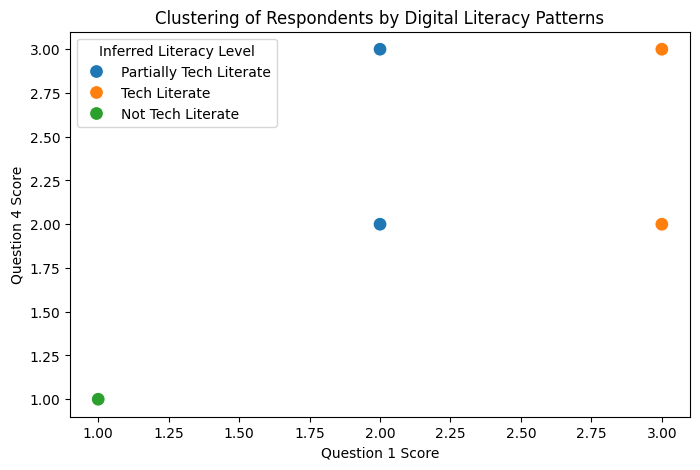

In [ ]:
# 3. Visualize cluster distribution

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_encoded, x="q1", y="q4", hue="literacy_level", s=100)
plt.title("Clustering of Respondents by Digital Literacy Patterns")
plt.xlabel("Question 1 Score")
plt.ylabel("Question 4 Score")
plt.legend(title="Inferred Literacy Level")
plt.show()

In [ ]:
# 4. Cluster centers visualization

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centers["literacy_level"] = [labels[i] for i in range(3)]
print(centers)

        age   q1        q2   q3        q4           literacy_level
0  0.333333  3.0  2.666667  3.0  2.666667            Tech Literate
1  2.500000  1.0  1.000000  1.0  1.000000        Not Tech Literate
2  0.800000  2.0  2.000000  2.2  2.200000  Partially Tech Literate
